# Week 6 - Overfitting and performance Evaluation

----
## Theory
*Due to missing note book*

### Models
* Linear models - linear combination of our features.
* As many free parameters as features = perfect fit of model (probably overfitted model)

#### Control model complexity 
Find parameters or mechanisms that control complexity.

> Everything should made as simple as possible, but not simpler. - *Einstein*

#### Decision trees
* *Hunts alorithm*
* Generate full tree, cut of branches to tune/prune

### Train, test and generalization error
#### Training error
How much the model deviates from the average

#### Test error
Testing the trained model on new data. The test set did not train the model. 

Unbiased estimate.

#### *Overfitting*
*Plotting training and test error.*

* Overfitting - while training erorr usually decreases for overly complex models, the test error increases.
* Test error is the more true error.
* **Don't validate a model on the same data it was trained upon!**

#### Generalization error
The test error evaluated over infinitely many test sets - **the true performance of our model**

Average test error over infinitely amny tests.

### Cross-validation
**Purpose:** Estimate generalization error.

![Cross-validation](methods.png)
#### Holdout
Partition dataset in two, for training and testing randomly.

#### K-fold
Partition data in $K$ parts. Each part is a test set, and the other $K-1$ training sets. Take out random observations. Each observation is only part of test set once.

#### Stratify cross-validation
Class proportion of training and test sets are the same.

#### Leave-one-out
$N$ parts. Let each set be a test set and $N-1$ training sets.

Evaluate one model at a time. 

#### Pros and cons of the different models
* **Holdout** - one does not take variety into account, there can be large differences between training and test dataset - can end up seing the one model as the only possibility, performance is good not much recursion on data (computationally efficient)
* **Leave-one-out** - generates very specialized models, but tests on all data -- computationally inefficient. Large variance, unbiased.
* **K-fold** - makes it easier to evaluate the final model as there will "only" be 9 different models to evaluate which still will account for variety in data, computationally better than leave-one-out

**2-layer cross-validation**

### Feature subset selection
Control complexity - using a subset of the attributes.

**How many different ways can we choose a subset?**
* $M^2$
* $2^M$ - can be in the model or not (for all possibilities)
* $M!$
* $\frac{M\times(M+1)}{2}$

![Cross-validation](fs.png)

#### Forward selection 
* Start with no features
* Compute cross-validation error
  * Current feature subset
  * All subsets equal to the current + one added feature
* Choose best subset
* Repeat until no further improvement

**Adding a feature only if it improves the test error.**

![Cross-validation](bs.png)

#### Backwards selection
* Start with all features
* Compute cross-validation error
  * Current feature subset
  * All subsets equal to the current minus one feature
* Choose best subset
* Repeat until no further improvement

**Removing a feature if it does not improve the test error**

*You are not guaranteed the same features using the different techniques on the same data!*

### Statistical evaluation of the performance classifiers
#### Credibility interval
#### Significance of classifiers

----
## Exercises

### Imports

In [10]:
from matplotlib.pyplot import *
% matplotlib inline
import numpy as np
from pylab import *
from scipy.io import loadmat
from sklearn import cross_validation, tree
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as lm
from scipy import stats

### All common variables and data 
At least for exercises 6.1.1, 6.1.2 and 6.2.1

In [11]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('Data/wine2.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = cross_validation.KFold(N,K,shuffle=True)
#CV = cross_validation.StratifiedKFold(y.A.ravel(),k=K)

# Initialize variable
Error_train = np.empty((len(tc),K))
Error_test = np.empty((len(tc),K))


### Exercise 6.1.1

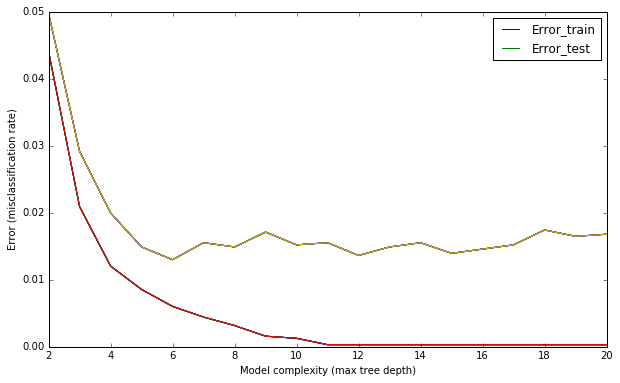

In [19]:
# exercise 6.1.1
# Simple holdout-set crossvalidation
test_proportion = 0.5
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=test_proportion)

for i, t in enumerate(tc):
    # Fit decision tree classifier, Gini split criterion, different pruning levels
    dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
    dtc = dtc.fit(X_train,y_train.ravel().T)

    # Evaluate classifier's misclassification rate over train/test data
    y_est_test = dtc.predict(X_test)
    y_est_train = dtc.predict(X_train)
    misclass_rate_test = sum(np.abs(np.mat(y_est_test).T - y_test)) / float(len(y_est_test))
    misclass_rate_train = sum(np.abs(np.mat(y_est_train).T - y_train)) / float(len(y_est_train))
    Error_test[i], Error_train[i] = misclass_rate_test, misclass_rate_train
    
f = figure(figsize=(10,6)); f.hold(True)
plot(tc, Error_train)
plot(tc, Error_test)
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate)')
legend(['Error_train','Error_test'])
    
show()    


### Exercise 6.1.2

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..


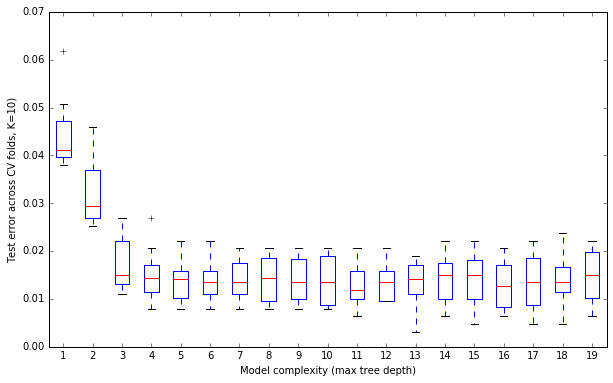

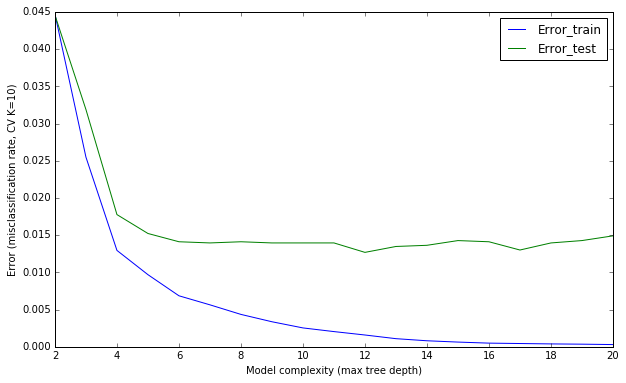

In [20]:
# exercise 6.1.2

k=0
for train_index, test_index in CV:
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:].A, y[train_index,:].A
    X_test, y_test = X[test_index,:].A, y[test_index,:].A

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        dtc = dtc.fit(X_train,y_train.ravel())
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = sum(np.abs(np.mat(y_est_test).T - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(np.mat(y_est_train).T - y_train)) / float(len(y_est_train))
        Error_test[i,k], Error_train[i,k] = misclass_rate_test, misclass_rate_train
    k+=1

    
f = figure(figsize=(10,6)); f.hold(True)
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure(figsize=(10,6)); f.hold(True)
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
    
show()


### Exercise 6.2.1

In [2]:
# exercise 6.1.2

k=0
for train_index, test_index in CV:
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:].A, y[train_index,:].A
    X_test, y_test = X[test_index,:].A, y[test_index,:].A

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        dtc = dtc.fit(X_train,y_train.ravel())
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = sum(np.abs(np.mat(y_est_test).T - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(np.mat(y_est_train).T - y_train)) / float(len(y_est_train))
        Error_test[i,k], Error_train[i,k] = misclass_rate_test, misclass_rate_train
    k+=1

    
f = figure(figsize=(10,6)); f.hold(True)
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure(figsize=(10,6)); f.hold(True)
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
    
show()


NameError: name 'CV' is not defined

### Exercise 6.3.1

In [1]:
# exercise 6.3.1

# Initialize variables
Error_logreg = np.empty((K,1))
Error_dectree = np.empty((K,1))
n_tested=0

k=0
for train_index, test_index in CV:
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index,:]
    X_test = X[test_index,:]
    y_test = y[test_index,:]

    # Fit and evaluate Logistic Regression classifier
    model = lm.logistic.LogisticRegression(C=N)
    model = model.fit(X_train, y_train.A.ravel())
    y_logreg = np.mat(model.predict(X_test)).T
    Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    
    # Fit and evaluate Decision Tree classifier
    model2 = tree.DecisionTreeClassifier()
    model2 = model2.fit(X_train, y_train.A.ravel())
    y_dectree = np.mat(model2.predict(X_test)).T
    Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

    k+=1log

# Use T-test to check if classifiers are significantly different
[tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
if pvalue<=0.05:
    print('Classifiers are significantly different. (p={0})'.format(pvalue[0]))
else:
    print('Classifiers are not significantly different (p={0})'.format(pvalue[0]))        
    
# Boxplot to compare classifier error distributions
figure(figsize=(10,6))
boxplot(np.bmat('Error_logreg, Error_dectree'))
xlabel('Logistic Regression   vs.   Decision Tree')
ylabel('Cross-validation error [%]')

show()

NameError: name 'np' is not defined